### Appending Prices

In [95]:
# Create a dataframe with all the prices from years 2012-2021
import pandas as pd

# Read the csv file
prices2012 = pd.read_csv('2012prices.csv')
prices2013 = pd.read_csv('2013prices.csv')
prices2014 = pd.read_csv('2014prices.csv')
prices2015 = pd.read_csv('2015prices.csv')
prices2016 = pd.read_csv('2016prices.csv')
prices2017 = pd.read_csv('2017prices.csv')
prices2018 = pd.read_csv('2018prices.csv')
prices2019 = pd.read_csv('2019prices.csv')
prices2020 = pd.read_csv('2020prices.csv')
prices2021 = pd.read_csv('2021prices.csv')
prices_emp2012 = pd.read_csv('2012prices_emp.csv')
prices_emp2013 = pd.read_csv('2013prices_emp.csv')
prices_emp2014 = pd.read_csv('2014prices_emp.csv')
prices_emp2015 = pd.read_csv('2015prices_emp.csv')
prices_emp2016 = pd.read_csv('2016prices_emp.csv')
prices_emp2017 = pd.read_csv('2017prices_emp.csv')
prices_emp2018 = pd.read_csv('2018prices_emp.csv')
prices_emp2019 = pd.read_csv('2019prices_emp.csv')
prices_emp2020 = pd.read_csv('2020prices_emp.csv')
prices_emp2021 = pd.read_csv('2021prices_emp.csv')

# create a new dataframe with all the prices. Reset the index
prices = pd.concat([prices2012, prices2013, prices2014, prices2015, prices2016, prices2017, prices2018, prices2019, prices2020, prices2021])
prices.reset_index(drop=True, inplace=True)
prices = prices[['1']]
prices.rename(columns={'1': 'Price'}, inplace=True)

prices_emp = pd.concat([prices_emp2012, prices_emp2013, prices_emp2014, prices_emp2015, prices_emp2016, prices_emp2017, prices_emp2018, prices_emp2019, prices_emp2020, prices_emp2021])
prices_emp.reset_index(drop=True, inplace=True)
prices_emp = prices_emp[['Price']]

# Date the prices. First hour is 01:01:2012 00:00, last hour is 31:12:2021 23:00. Do not account for leap years
dates = pd.date_range(start='01/01/2012 00:00', end='31/12/2021 23:00', freq='H')
# Delete the 29th of February
dates = dates[~((dates.month == 2) & (dates.day == 29))]
prices['Date'] = dates
prices_emp['Date'] = dates
# Create a column with the year
prices['Year'] = prices['Date'].dt.year
prices_emp['Year'] = prices_emp['Date'].dt.year

print(prices)

# Save the dataframe as a csv file
prices.to_csv('prices.csv', index=False)
prices_emp.to_csv('prices_emp.csv', index=False)


           Price                Date  Year
0      25.223084 2012-01-01 00:00:00  2012
1      25.221511 2012-01-01 01:00:00  2012
2      25.222035 2012-01-01 02:00:00  2012
3      25.222560 2012-01-01 03:00:00  2012
4      25.223084 2012-01-01 04:00:00  2012
...          ...                 ...   ...
87595  29.730356 2021-12-31 19:00:00  2021
87596  29.942060 2021-12-31 20:00:00  2021
87597  29.942060 2021-12-31 21:00:00  2021
87598  29.942060 2021-12-31 22:00:00  2021
87599  29.730356 2021-12-31 23:00:00  2021

[87600 rows x 3 columns]


### Price difference

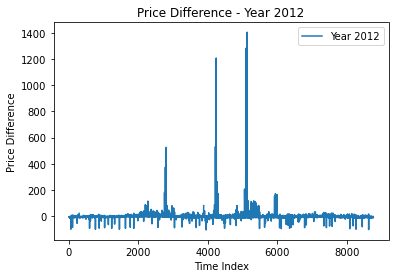

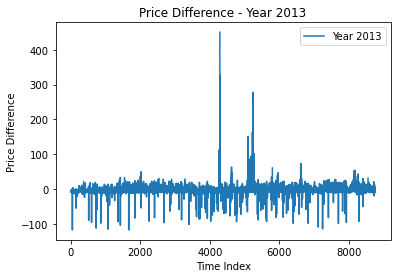

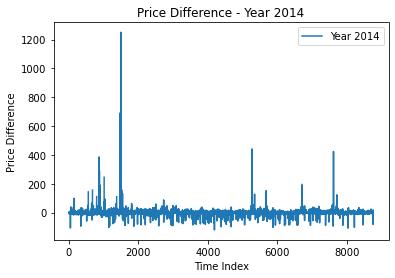

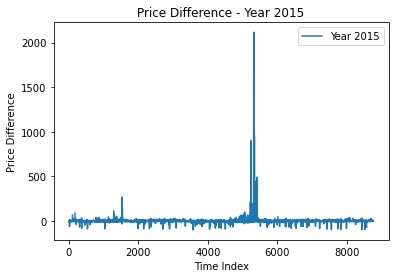

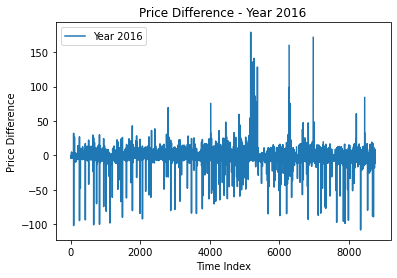

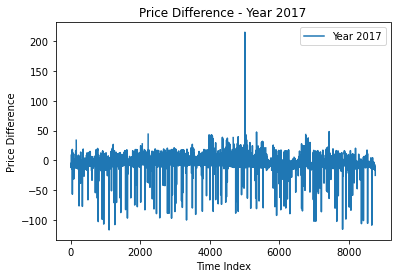

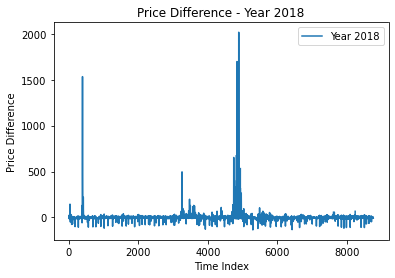

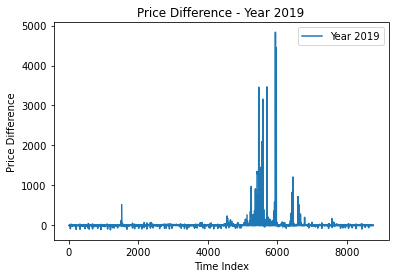

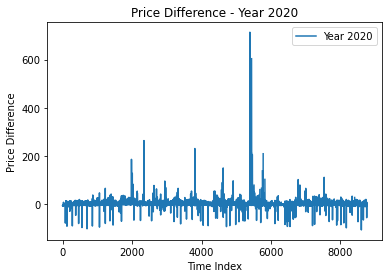

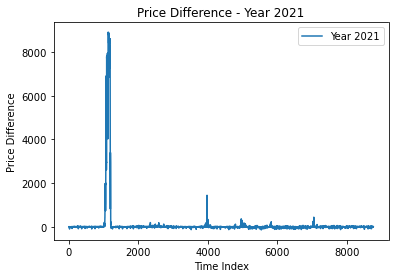

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the price difference data
price_diff_df = pd.read_csv("price_diff.csv")

# Define the range of years
years = range(2012, 2022)

# Iterate over the years
for year in years:
    # Create a new figure and axis for each plot
    fig, ax = plt.subplots()
    
    # Plot the price difference for the specific year
    ax.plot(price_diff_df["Time_Index"], price_diff_df[f"{year}Price Difference"], label=f"Year {year}")
    
    # Set labels and title
    ax.set_xlabel("Time Index")
    ax.set_ylabel("Price Difference")
    ax.set_title(f"Price Difference - Year {year}")
    
    # Add a legend
    ax.legend()
    
    # Show the plot
    plt.show()


### Simple metrics over the years

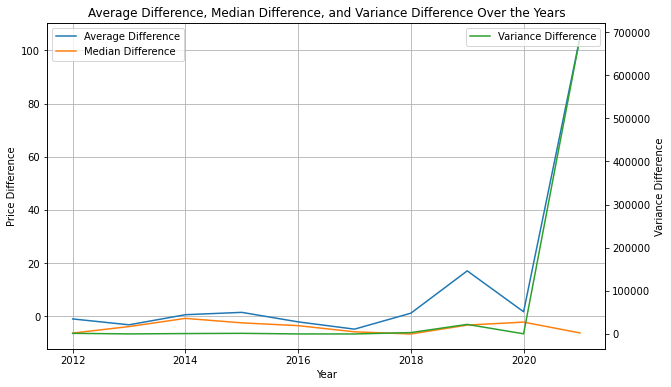

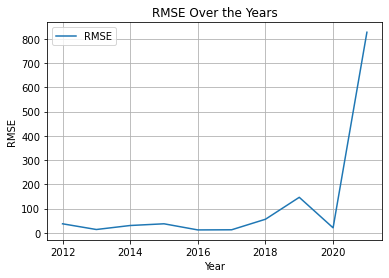

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the metrics data
metrics_df = pd.read_csv("metrics_simple.csv")

# # drop last row
# metrics_df = metrics_df[:-1]

# Define the range of years
years = metrics_df["Year"]

# Create a figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the Average Difference on the first axis
ax1.plot(years, metrics_df["Average Difference"], label="Average Difference", color='tab:blue')
ax1.plot(years, metrics_df["Median Difference"], label="Median Difference", color='tab:orange')
ax1.set_xlabel("Year")
ax1.set_ylabel("Price Difference")
ax1.set_title("Average Difference, Median Difference, and Variance Difference Over the Years")
ax1.legend(loc='upper left')
ax1.grid(True)

# Create a second axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot the Variance Difference on the second axis
ax2.plot(years, metrics_df["Variance Difference"], label="Variance Difference", color='tab:green')
ax2.set_ylabel("Variance Difference")
ax2.legend(loc='upper right')

plt.show()

# On a new plot, plot the RMSE for each year
plt.plot(years, metrics_df["RMSE"], label="RMSE", color='tab:blue')
plt.xlabel("Year")
plt.ylabel("RMSE")
plt.title("RMSE Over the Years")
plt.legend()
plt.grid(True)
plt.show()


### Coefficients

C:\Users\tsbon\AppData\Local\Temp\ipykernel_23024\1480772712.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appended_coef_unclipped[f'{year}Pearson daily'] = daily_coefficients_unclipped[f"{year}Pearson daily"]
C:\Users\tsbon\AppData\Local\Temp\ipykernel_23024\1480772712.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appended_coef_clipped1000[f'{year}Pearson daily'] = daily_coefficients_clipped1000[f"{year}Pearson daily"]
C:\Users\tsbon\AppData\Local\Temp\ipykernel_23024\1480772712.py:24: Settin

     Day  Average Daily Pearson (clipped at 1000$/MWh)
0      1                                      0.618736
1      2                                      0.533684
2      3                                      0.708595
3      4                                      0.615161
4      5                                      0.626629
..   ...                                           ...
360  361                                      0.691556
361  362                                      0.637373
362  363                                      0.615735
363  364                                      0.634968
364  365                                      0.643950

[365 rows x 2 columns]
     Day  Average Daily Pearson unclipped
0      1                         0.618736
1      2                         0.533684
2      3                         0.708595
3      4                         0.615161
4      5                         0.626629
..   ...                              ...
360  361              

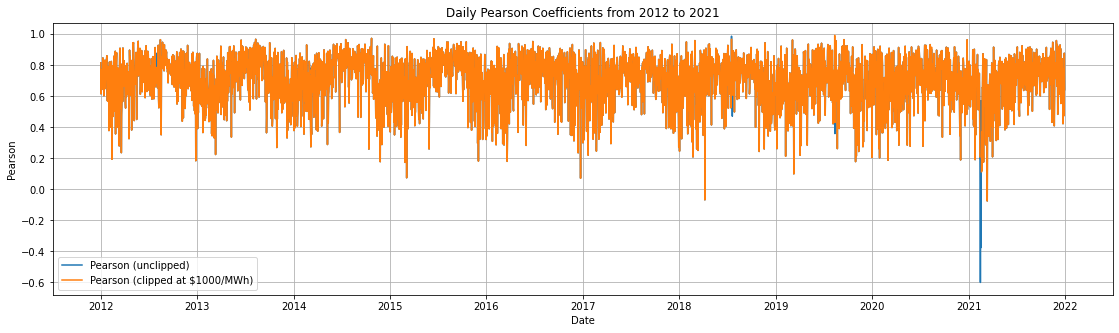

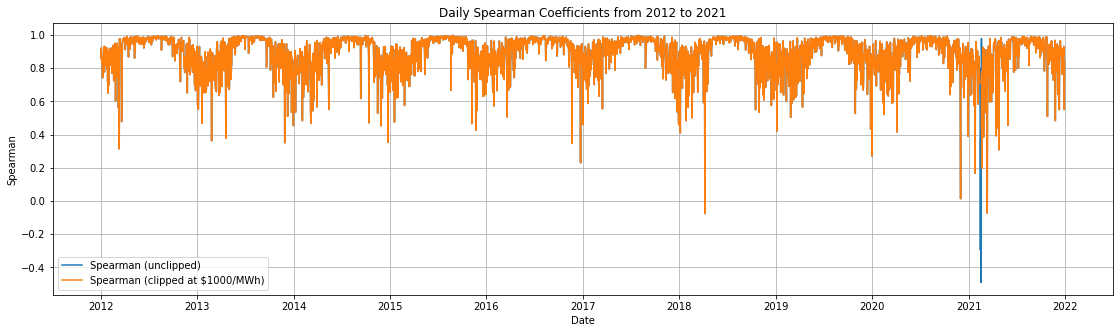

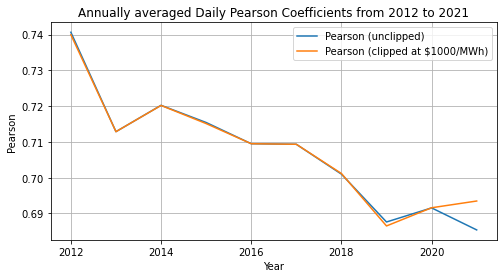

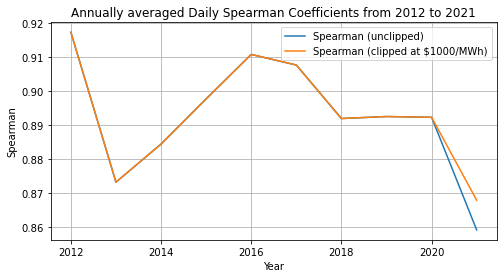

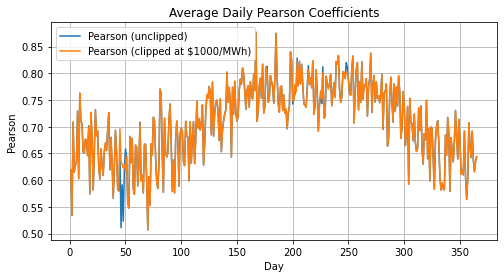

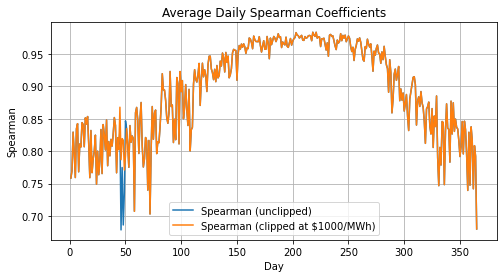

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
daily_coefficients_unclipped = pd.read_csv("daily_coefficients_unclipped.csv")
daily_coefficients_clipped1000 = pd.read_csv("daily_coefficients_clipped1000.csv")

averaged_p_unclipped = daily_coefficients_unclipped[["Day"]]
averaged_p_clipped1000 = daily_coefficients_clipped1000[["Day"]]
averaged_s_unclipped = daily_coefficients_unclipped[["Day"]]
averaged_s_clipped1000 = daily_coefficients_clipped1000[["Day"]]
day_average_p_unclipped = daily_coefficients_unclipped[["Day"]]
day_average_p_clipped1000 = daily_coefficients_clipped1000[["Day"]]
day_average_s_unclipped = daily_coefficients_unclipped[["Day"]]
day_average_s_clipped1000 = daily_coefficients_clipped1000[["Day"]]

# Extract the years from the columns
years = range(2012, 2022)

# Put all the Pearson coefficients in a single column
appended_coef_unclipped = daily_coefficients_unclipped[["Day"]]
appended_coef_clipped1000 = daily_coefficients_clipped1000[["Day"]]
for year in years:
    appended_coef_unclipped[f'{year}Pearson daily'] = daily_coefficients_unclipped[f"{year}Pearson daily"]
    appended_coef_clipped1000[f'{year}Pearson daily'] = daily_coefficients_clipped1000[f"{year}Pearson daily"]
coefficient_pearson_unclipped = pd.melt(appended_coef_unclipped, id_vars=["Day"], var_name="Year", value_name="Coefficient")
coefficient_pearson_clipped1000 = pd.melt(appended_coef_clipped1000, id_vars=["Day"], var_name="Year", value_name="Coefficient")

# Put all the Spearman coefficients in a single column
appended_coef_unclipped = daily_coefficients_unclipped[["Day"]]
appended_coef_clipped1000 = daily_coefficients_clipped1000[["Day"]]
for year in years:
    appended_coef_unclipped[f'{year}Spearman daily'] = daily_coefficients_unclipped[f"{year}Spearman daily"]
    appended_coef_clipped1000[f'{year}Spearman daily'] = daily_coefficients_clipped1000[f"{year}Spearman daily"]
coefficient_spearman_unclipped = pd.melt(appended_coef_unclipped, id_vars=["Day"], var_name="Year", value_name="Coefficient")
coefficient_spearman_clipped1000 = pd.melt(appended_coef_clipped1000, id_vars=["Day"], var_name="Year", value_name="Coefficient")

# Date the Pearson and Spearman coefficients. First day is 01:01:2012, last day is 31:12:2021. Do not account for leap years
dates = pd.date_range(start="2012-01-01", end="2021-12-31", freq="D")
# Delete the 29th of February
dates = dates[~((dates.month == 2) & (dates.day == 29))]
# Add the dates to the dataframes
coefficient_pearson_unclipped["Date"] = dates
coefficient_spearman_unclipped["Date"] = dates
coefficient_pearson_clipped1000["Date"] = dates
coefficient_spearman_clipped1000["Date"] = dates

# Calculate the average coefficient for each year
for year in years:
    averaged_p_clipped1000[f"{year}Pearson daily"] = daily_coefficients_clipped1000[f"{year}Pearson daily"].mean()
    averaged_p_unclipped[f"{year}Pearson daily"] = daily_coefficients_unclipped[f"{year}Pearson daily"].mean()
    averaged_s_clipped1000[f"{year}Spearman daily"] = daily_coefficients_clipped1000[f"{year}Spearman daily"].mean()
    averaged_s_unclipped[f"{year}Spearman daily"] = daily_coefficients_unclipped[f"{year}Spearman daily"].mean()
# Keep only the first row and delete the day column
averaged_p_clipped1000 = averaged_p_clipped1000.iloc[[0]]
averaged_p_unclipped = averaged_p_unclipped.iloc[[0]]
averaged_s_clipped1000 = averaged_s_clipped1000.iloc[[0]]
averaged_s_unclipped = averaged_s_unclipped.iloc[[0]]
averaged_p_clipped1000 = averaged_p_clipped1000.drop(columns=["Day"])
averaged_p_unclipped = averaged_p_unclipped.drop(columns=["Day"])
averaged_s_clipped1000 = averaged_s_clipped1000.drop(columns=["Day"])
averaged_s_unclipped = averaged_s_unclipped.drop(columns=["Day"])

# Invert the columns and rows. Rename the columns and rows
averaged_p_clipped1000 = averaged_p_clipped1000.transpose()
averaged_p_unclipped = averaged_p_unclipped.transpose()
averaged_s_clipped1000 = averaged_s_clipped1000.transpose()
averaged_s_unclipped = averaged_s_unclipped.transpose()
averaged_p_clipped1000 = averaged_p_clipped1000.rename(columns={0: "Average Pearson (clipped at 1000$/MWh)"})
averaged_p_unclipped = averaged_p_unclipped.rename(columns={0: "Average Pearson unclipped"})
averaged_s_clipped1000 = averaged_s_clipped1000.rename(columns={0: "Average Spearman (clipped at 1000$/MWh)"})
averaged_s_unclipped = averaged_s_unclipped.rename(columns={0: "Average Spearman unclipped"})
for year in years:
    averaged_p_clipped1000 = averaged_p_clipped1000.rename(index={f"{year}Pearson daily": year})
    averaged_p_unclipped = averaged_p_unclipped.rename(index={f"{year}Pearson daily": year})
    averaged_s_clipped1000 = averaged_s_clipped1000.rename(index={f"{year}Spearman daily": year})
    averaged_s_unclipped = averaged_s_unclipped.rename(index={f"{year}Spearman daily": year})

# calculate the average of the columns containing "Pearson" of the daily coefficients_clipped1000 dataframe
day_average_p_clipped1000['Average Daily Pearson (clipped at 1000$/MWh)'] = daily_coefficients_clipped1000.filter(regex="Pearson").mean(axis=1)
day_average_p_unclipped['Average Daily Pearson unclipped'] = daily_coefficients_unclipped.filter(regex="Pearson").mean(axis=1)
day_average_s_clipped1000['Average Daily Spearman (clipped at 1000$/MWh)'] = daily_coefficients_clipped1000.filter(regex="Spearman").mean(axis=1)
day_average_s_unclipped['Average Daily Spearman unclipped'] = daily_coefficients_unclipped.filter(regex="Spearman").mean(axis=1)
print(day_average_p_clipped1000)
print(day_average_p_unclipped)
print(day_average_s_clipped1000)
print(day_average_s_unclipped)

# Plot the Pearson coefficients for each day
plt.figure(figsize=(19, 5))
plt.plot(coefficient_pearson_unclipped["Date"], coefficient_pearson_unclipped["Coefficient"], label="Pearson (unclipped)")
plt.plot(coefficient_pearson_clipped1000["Date"], coefficient_pearson_clipped1000["Coefficient"], label="Pearson (clipped at $1000/MWh)")
plt.xlabel("Date")
plt.ylabel("Pearson")
plt.title("Daily Pearson Coefficients from 2012 to 2021")
plt.grid(True)
plt.legend()
plt.show()

# Plot the coefficients for each day
plt.figure(figsize=(19, 5))
plt.plot(coefficient_spearman_unclipped["Date"], coefficient_spearman_unclipped["Coefficient"], label="Spearman (unclipped)")
plt.plot(coefficient_spearman_clipped1000["Date"], coefficient_spearman_clipped1000["Coefficient"], label="Spearman (clipped at $1000/MWh)")
plt.xlabel("Date")
plt.ylabel("Spearman")
plt.title("Daily Spearman Coefficients from 2012 to 2021")
plt.grid(True)
plt.legend()
plt.show()

# Plot the average Pearson coefficients for each year
plt.figure(figsize=(8, 4))
plt.plot(averaged_p_unclipped.index, averaged_p_unclipped["Average Pearson unclipped"], label="Pearson (unclipped)")
plt.plot(averaged_p_clipped1000.index, averaged_p_clipped1000["Average Pearson (clipped at 1000$/MWh)"], label="Pearson (clipped at $1000/MWh)")
plt.xlabel("Year")
plt.ylabel("Pearson")
plt.title("Annually averaged Daily Pearson Coefficients from 2012 to 2021")
plt.grid(True)
plt.legend()
plt.show()

# Plot the average Spearman coefficients for each year
plt.figure(figsize=(8, 4))
plt.plot(averaged_s_unclipped.index, averaged_s_unclipped["Average Spearman unclipped"], label="Spearman (unclipped)")
plt.plot(averaged_s_clipped1000.index, averaged_s_clipped1000["Average Spearman (clipped at 1000$/MWh)"], label="Spearman (clipped at $1000/MWh)")
plt.xlabel("Year")
plt.ylabel("Spearman")
plt.title("Annually averaged Daily Spearman Coefficients from 2012 to 2021")
plt.grid(True)
plt.legend()
plt.show()

# Plot the average Pearson coefficients for each day
plt.figure(figsize=(8, 4))
plt.plot(day_average_p_unclipped['Day'], day_average_p_unclipped["Average Daily Pearson unclipped"], label="Pearson (unclipped)")
plt.plot(day_average_p_clipped1000['Day'], day_average_p_clipped1000["Average Daily Pearson (clipped at 1000$/MWh)"], label="Pearson (clipped at $1000/MWh)")
plt.xlabel("Day")
plt.ylabel("Pearson")
plt.title("Average Daily Pearson Coefficients")
plt.grid(True)
plt.legend()
plt.show()

# Plot the average Spearman coefficients for each day
plt.figure(figsize=(8, 4))
plt.plot(day_average_s_unclipped['Day'], day_average_s_unclipped["Average Daily Spearman unclipped"], label="Spearman (unclipped)")
plt.plot(day_average_s_clipped1000['Day'], day_average_s_clipped1000["Average Daily Spearman (clipped at 1000$/MWh)"], label="Spearman (clipped at $1000/MWh)")
plt.xlabel("Day")
plt.ylabel("Spearman")
plt.title("Average Daily Spearman Coefficients")
plt.grid(True)
plt.legend()
plt.show()



### Price distribution

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'prices_emp.csv' and 'prices.csv' with the paths to your empirical and synthetic price CSV files
empirical_prices_file = 'prices_emp.csv'
synthetic_prices_file = 'prices.csv'

# Load empirical prices and synthetic prices into DataFrames
df_empirical = pd.read_csv(empirical_prices_file)
df_synthetic = pd.read_csv(synthetic_prices_file)

# Function to create buckets based on price values
def create_buckets(price):
    if price <= 5:
        return '0-5'
    elif price <= 50:
        return '5-50'
    elif price <= 200:
        return '50-200'
    elif price <= 1000:
        return '200-1000'
    else:
        return '>1000'

# Apply the bucket function to create a new column 'bucket' for both DataFrames
df_empirical['bucket'] = df_empirical['price'].apply(create_buckets)
df_synthetic['bucket'] = df_synthetic['price'].apply(create_buckets)

# Group the data by 'bucket' and count the occurrences
empirical_counts = df_empirical['bucket'].value_counts().sort_index()
synthetic_counts = df_synthetic['bucket'].value_counts().sort_index()

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
bar_positions_emp = range(len(empirical_counts))
bar_positions_syn = [pos + bar_width for pos in bar_positions_emp]

# Plot the bars for empirical prices and synthetic prices
ax.bar(bar_positions_emp, empirical_counts, bar_width, label='Empirical Prices', alpha=0.8)
ax.bar(bar_positions_syn, synthetic_counts, bar_width, label='Synthetic Prices', alpha=0.8)

# Customize the plot
ax.set_xticks([pos + bar_width / 2 for pos in bar_positions_emp])
ax.set_xticklabels(empirical_counts.index)
ax.set_xlabel('Price Buckets')
ax.set_ylabel('Count')
ax.set_title('Empirical vs. Synthetic Prices by Buckets')
ax.legend()

plt.tight_layout()
plt.show()


KeyError: 'price'